In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Datasets/satislar.csv")

In [3]:
dataFrame = pd.DataFrame(data)

In [4]:
dataFrame.iloc[19,1] = 46970

<Axes: ylabel='Satislar'>

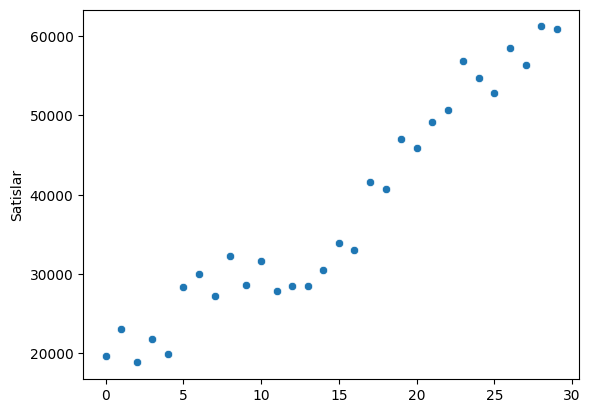

In [5]:
sns.scatterplot(dataFrame["Satislar"])

In [6]:
dataFrame

,Aylar,Satislar
0,8,19671.5
1,10,23102.5
2,11,18865.5
3,13,21762.5
4,14,19945.5
5,19,28321.0
6,19,30075.0
7,20,27222.5
8,20,32222.5
9,24,28594.5


In [7]:
dataFrame.isnull().sum()

Aylar       0
Satislar    0
dtype: int64

In [8]:
aylar = dataFrame["Aylar"].values
satislar = dataFrame["Satislar"].values

In [9]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest = train_test_split(aylar, satislar, test_size=0.33)

In [10]:
# from sklearn.preprocessing import StandardScaler
# sc  = StandardScaler()
# xTrain = sc.fit_transform(xTrain.reshape(-1,1))
# xTest = sc.fit_transform(xTest.reshape(-1,1))
# yTrain = sc.fit_transform(yTrain.reshape(-1,1))
# yTest = sc.fit_transform(yTest.reshape(-1,1))

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
#model inşası -- lineer regresyon
lr = LinearRegression()

In [13]:
lr.fit(xTrain.reshape(-1,1),yTrain.reshape(-1,1))

LinearRegression()

In [15]:
tahmin = lr.predict(xTest.reshape(-1,1))

In [16]:
tahminDf = pd.DataFrame(data=tahmin,columns=["tahmin"])
testDf = pd.DataFrame(data=yTest,columns=["test"])
yeniDf = pd.concat([tahminDf,testDf],axis=1)


In [24]:
sorted_indices = np.argsort(xTrain)
xTrain_sorted = xTrain[sorted_indices]
yTrain_sorted = yTrain[sorted_indices]

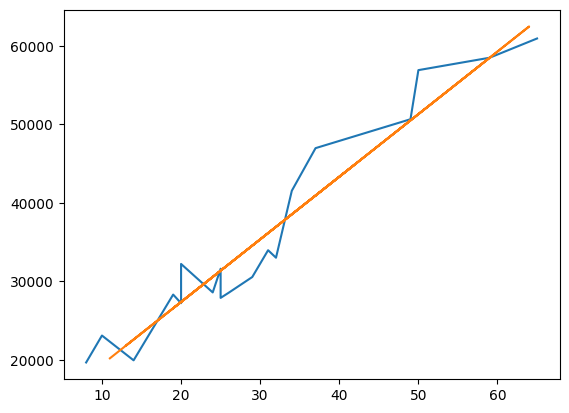

In [39]:
plt.plot(xTrain_sorted, yTrain_sorted)
sorted_indices = np.argsort(xTest)
xTrain= xTrain[sorted_indices]
plt.plot(xTest,tahmin.reshape(-1))
